### Contents
A Linear Relationship<br>
&emsp;Create Linear Data<br>
&emsp;Plot Linear Data<br>
&emsp;Design a Model (No Layers and No Activations)<br>
&emsp;Create the Model and Print the Initial Parameters<br>
&emsp;Train the Model and Print the Results<br>
&emsp;Plot Labels and Predictions<br>

In [6]:
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch import Tensor

import utilities as util

Create Linear Data

In [7]:
def create_linear_data(weight:float, bias: float) -> Tuple[List[float], List[float]]:
    X = [float(x) for x in range(-10, 10)]
    y = [weight*x+bias for x in X]
    X, y = np.array(X, dtype=np.float32), np.array(y, np.float32)
    # We need to reshape X and y so that each row is a single feature/label.
    # This is needed for training.
    X = np.reshape(X, (len(X), 1))
    y = np.reshape(y, (len(y), 1))
    return X, y

X_train, y_train = create_linear_data(5, 9)

print('X_train Dimenstions:',X_train.ndim)
print('X_train Shape:', X_train.shape)
print(X_train[:2])

print('y_train Dimenstions:',y_train.ndim)
print('y_train Shape:', y_train.shape)
print(y_train[:2])

X_train Dimenstions: 2
X_train Shape: (20, 1)
[[-10.]
 [ -9.]]
y_train Dimenstions: 2
y_train Shape: (20, 1)
[[-41.]
 [-36.]]


Plot Linear Data

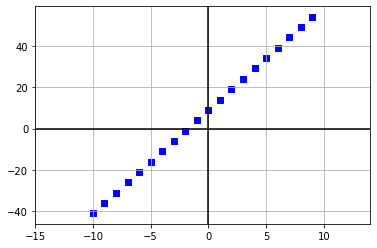

In [8]:
util.plot_data(X_train, y_train)

Design a Model (No Layers and No Activations)

In [9]:
class LinearRegressionModel(nn.Module):

    def __init__(self):
        super(LinearRegressionModel, self).__init__()

        self.linear1 = nn.Linear(1, 1, bias=True)

    def forward(self, input):
        l1 = self.linear1(input)
        return l1


Create the Model and Print the Initial Parameters

In [11]:
model = LinearRegressionModel()
util.print_parameters(model)

linear1.weight tensor([[-0.9306]])
linear1.bias tensor([-0.8874])


Train the Model and Print the Results

In [12]:
# When you have a large number of iterations over a small training set you are basically
# memorizing your training set.
config = {
    'epochs': 100,
    'lr': 0.01,
    'loss_function': nn.MSELoss()
}

model, losses = util.train_model(model, config, X_train, y_train)

# The loss should decrease with every iteration (epoch) over the training data.
util.print_results(model, losses)

0 : 6331.22146576643
10 : 19.43146638618782
20 : 0.18873785928008147
30 : 0.0018326312438148307
40 : 1.775154578353977e-05
50 : 1.6679337022651453e-07
60 : 4.9367372412234545e-09
70 : 4.9367372412234545e-09
80 : 4.9367372412234545e-09
90 : 4.9367372412234545e-09
99 : 4.9367372412234545e-09


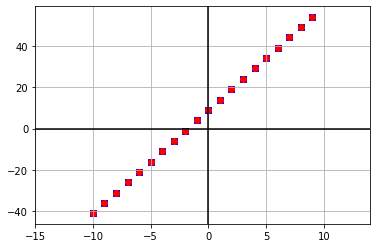

In [13]:
predictions = [model(torch.from_numpy(X)).detach().item() for X in X_train]
util.plot_data(np.array(X_train), np.array(y_train), np.array(predictions))

### A Quadratic Example

In [ ]:
def create_quadratic_data(a:float, b: float, c:float) -> Tuple[List[float], List[float]]:
    X = [float(x) for x in range(-10, 11)]
    y = [a*(x**2)+(b*x)+c for x in X]
    X, y = np.array(X, dtype=np.float32), np.array(y, np.float32)
    X = np.reshape(X, (len(X), 1))
    y = np.reshape(y, (len(y), 1))
    return X, y

X_train, y_train = create_quadratic_data(5, 2, 3)

print('X_train Dimenstions:',X_train.ndim)
print('X_train Shape:', X_train.shape)
print(X_train[:2])

print('y_train Dimenstions:',y_train.ndim)
print('y_train Shape:', y_train.shape)
print(y_train[:2])

In [ ]:
plot_data(X_train, y_train)

In [ ]:
model = LinearRegressionModel()
model, losses = train_model(model, X_train, y_train)

# The loss should decrease with every iteration (epoch) over the training data.
print_results(model, losses)

In [ ]:
predictions = [model(torch.from_numpy(X)).detach().item() for X in X_train]
plot_data(np.array(X_train), np.array(y_train), np.array(predictions))

In [ ]:
class QuadraticRegressionModel(nn.Module):

    def __init__(self):
        super(QuadraticRegressionModel, self).__init__()

        self.linear1 = nn.Linear(1, 6, bias=True)
        self.linear2 = nn.Linear(6, 6, bias=True)
        self.linear3 = nn.Linear(6, 1, bias=True)

    def forward(self, x, log=False):
        x = F.dropout(F.relu(self.linear1(x)), p=0.5)
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        #out = self.linear1(input)
        #out = F.relu(out)
        #out = F.dropout(out, p=0.5)
        #out = self.linear2(out)
        #out = F.relu(out)
        #out = self.linear3(out)
        return x

Test the Untrained Model with a Single Prediction

In [ ]:
model = QuadraticRegressionModel()
X = torch.tensor([1], dtype=torch.float32)
prediction = model(X, log=True)
print(X)
print(prediction)

In [ ]:
model = QuadraticRegressionModel()
model, losses = train_model(model, X_train, y_train)

# The loss should decrease with every iteration (epoch) over the training data.
print_results(model, losses)

Plot labels and predictions

In [ ]:
#model.eval() # Tell the model we are evaluating it so that it does not learn or dropout.
predictions = [model(torch.from_numpy(X)).detach().item() for X in X_train]

plot_data(np.array(X_train), np.array(y_train), np.array(predictions))